In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/citations.csv')

In [47]:
m = {'all':2, 'SCIENTIFIC REPORTS':3, 'SCIENCE':4, 'PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES':2, 'PLOS ONE': 2, 'PLOS GENETICS': 3,'PLOS BIOLOGY':3, 'NATURE COMMUNICATIONS':3, 'NATURE':5, 'JOURNAL OF INFORMETRICS':1 ,'EMBO JOURNAL':3, 'eLife':3}

In [48]:

prob, bins = np.histogram(df.Citations+1, bins= 2**np.arange(11), normed=True)

lr = LinearRegression()
lr.fit(np.log(bins[m['all']:-1].reshape(-1,1)),np.log(prob[m['all']:]))
print(np.round(lr.coef_[0],3), '(R^2 =',np.round(lr.score(np.log(bins[m['all']:-1].reshape(-1,1)),np.log(prob[m['all']:])),4),')')
x = np.arange(3, 1000).reshape(-1,1)
y = np.exp(lr.predict(np.log(x)))

-1.767 (R^2 = 0.9919 )


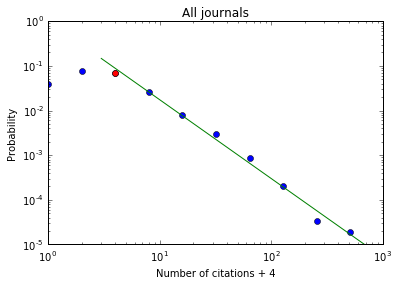

In [51]:
plt.loglog(bins[:-1], prob, 'o')
plt.xlabel('Number of citations + 4')
plt.ylabel('Probability')
plt.xlim(1,1000)
plt.ylim(10**-5,1)
plt.plot(x,y);
plt.plot(bins[m['all']], prob[m['all']], 'ro');
plt.title('All journals');

4.62205951083 3.0
SCIENTIFIC REPORTS -2.49 (R^2 = 0.9909 )


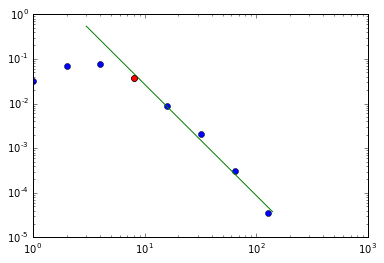

29.5762104005 19.0
SCIENCE -1.58 (R^2 = 0.9762 )


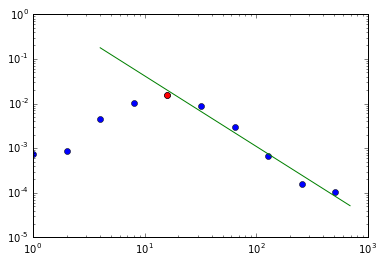

4.17561807332 3.0
PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES -2.429 (R^2 = 0.9609 )


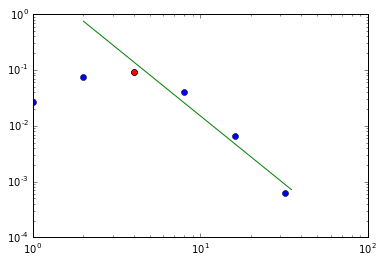

2.78606504065 2.0
PLOS ONE -2.816 (R^2 = 0.9919 )


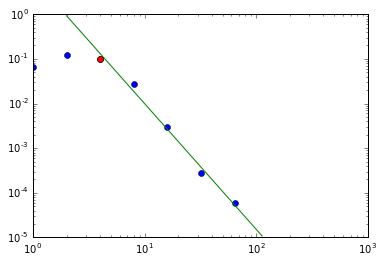

6.2512254902 5.0
PLOS GENETICS -2.972 (R^2 = 0.9849 )


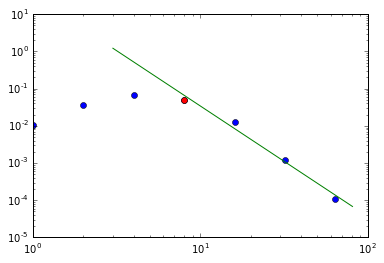

7.50765306122 6.0
PLOS BIOLOGY -2.367 (R^2 = 0.9741 )


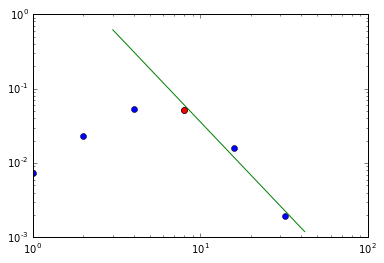

10.0499771794 7.0
NATURE COMMUNICATIONS -1.948 (R^2 = 0.977 )


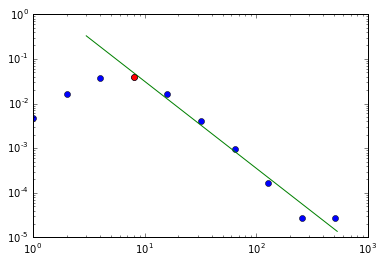

33.3148469093 22.0
NATURE -2.021 (R^2 = 0.9854 )


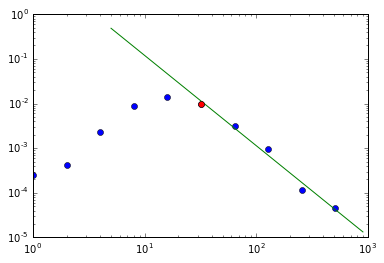

2.22033898305 2.0
JOURNAL OF INFORMETRICS -1.355 (R^2 = 0.9232 )


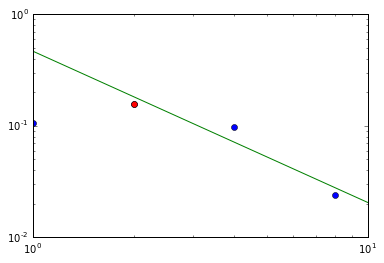

8.9154589372 7.0
EMBO JOURNAL -2.201 (R^2 = 0.9312 )


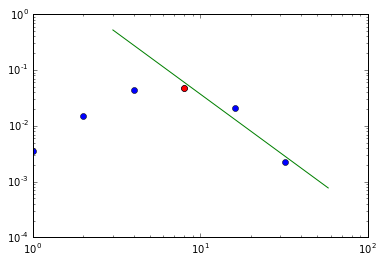

7.31769436997 5.0
eLife -2.184 (R^2 = 0.9418 )


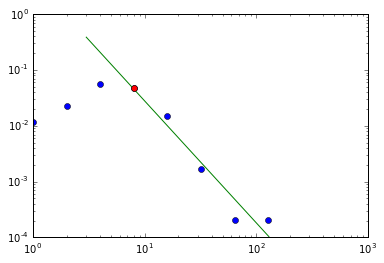

In [40]:
for j in df.Journal.unique():
    
    citations_j = df.loc[df.Journal == j, 'Citations']
    print(citations_j.mean(), citations_j.median())
    prob, bins = np.histogram(citations_j+1, bins= 2**np.arange(0,int(np.ceil(np.log2(citations_j.max())))+1), normed=True)
    #m = prob.argmax()
    lr = LinearRegression()
    lr.fit(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:]))
    print(j, np.round(lr.coef_[0],3), '(R^2 =',np.round(lr.score(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:])),4),')')
    x = np.arange(m[j], citations_j.max()).reshape(-1,1)
    y = np.exp(lr.predict(np.log(x)))
    plt.loglog(bins[:-1], prob, 'o')
    plt.plot(x,y);
    plt.plot(bins[m[j]], prob[m[j]], 'ro');
    plt.show()

4.62205951083 3.0
SCIENTIFIC REPORTS -2.49 (R^2 = 0.9909 )


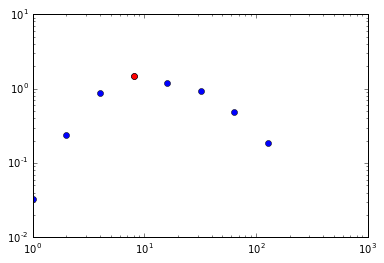

29.5762104005 19.0
SCIENCE -1.58 (R^2 = 0.9762 )


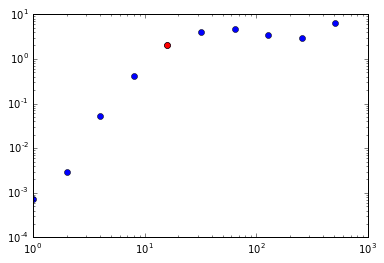

4.17561807332 3.0
PROCEEDINGS OF THE ROYAL SOCIETY B-BIOLOGICAL SCIENCES -2.429 (R^2 = 0.9609 )


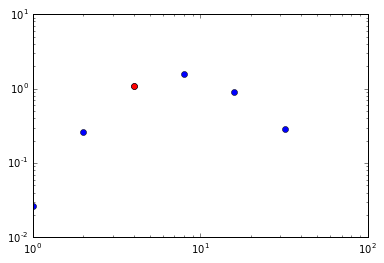

2.78606504065 2.0
PLOS ONE -2.816 (R^2 = 0.9919 )


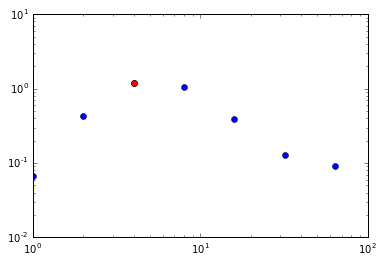

6.2512254902 5.0
PLOS GENETICS -2.972 (R^2 = 0.9849 )


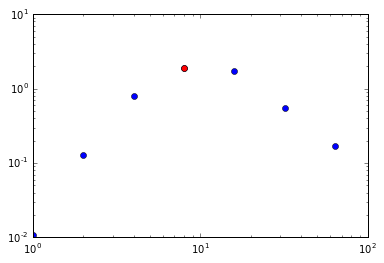

7.50765306122 6.0
PLOS BIOLOGY -2.367 (R^2 = 0.9741 )


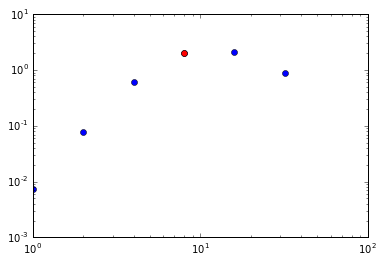

10.0499771794 7.0
NATURE COMMUNICATIONS -1.948 (R^2 = 0.977 )


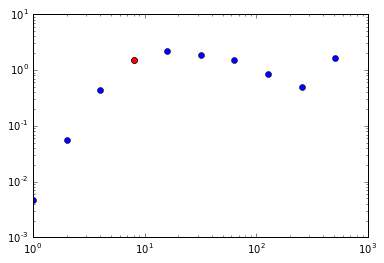

33.3148469093 22.0
NATURE -2.021 (R^2 = 0.9854 )


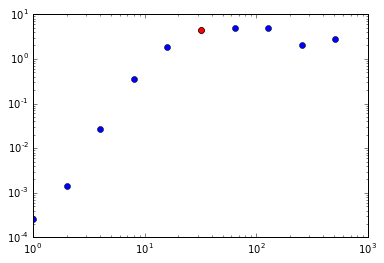

2.22033898305 2.0
JOURNAL OF INFORMETRICS -1.355 (R^2 = 0.9232 )


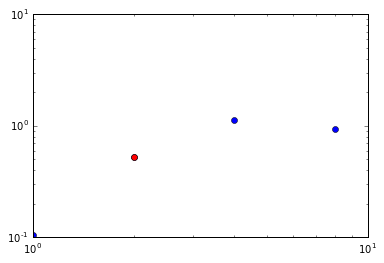

8.9154589372 7.0
EMBO JOURNAL -2.201 (R^2 = 0.9312 )


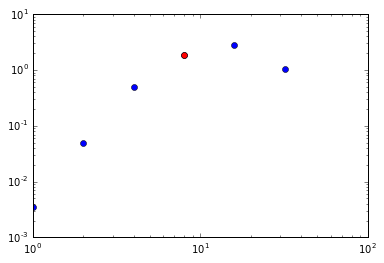

7.31769436997 5.0
eLife -2.184 (R^2 = 0.9418 )


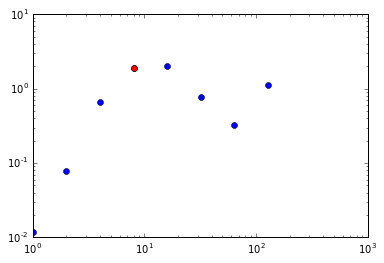

In [59]:
for j in df.Journal.unique():
    
    citations_j = df.loc[df.Journal == j, 'Citations']
    print(citations_j.mean(), citations_j.median())
    prob, bins = np.histogram(citations_j+1, bins= 2**np.arange(0,int(np.ceil(np.log2(citations_j.max())))+1), normed=True)
    #m = prob.argmax()
    lr = LinearRegression()
    lr.fit(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:]))
    print(j, np.round(lr.coef_[0],3), '(R^2 =',np.round(lr.score(np.log(bins[m[j]:-1].reshape(-1,1)),np.log(prob[m[j]:])),4),')')
    x = np.arange(m[j], citations_j.max()).reshape(-1,1)
    y = np.exp(lr.predict(np.log(x))) #/ x**-1.767
    plt.loglog(bins[:-1], prob / bins[:-1]**-1.767, 'o')
    #plt.plot(x,y);
    plt.plot(bins[m[j]], prob[m[j]] /bins[m[j]]**-1.767 , 'ro');
    plt.show()